# Viasat charging data

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Initial analysis and cleaning

In [353]:
# store and analyze dataset
viasatCharging_df_raw = pd.read_csv('data/viasatChargingData2024.csv')

# create a copy of the dataset to clean
viasatCharging_df = viasatCharging_df_raw.copy()

# print out first 5 rows
viasatCharging_df.head()

,Station Name,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Transaction ID,Driver Zip/Postal Code,Start SOC,End SOC,County,System S/N,Model Number,OnRamp ID Tag,Payment Terminal Session ID,Vehicle MAC ID
0,CARLSBAD / CBD-N1-EVC-1,"Viasat, Inc.",2/16/2024 8:16,PST,2/16/2024 15:18,PST,2/16/2024 15:18,7:01:55,7:01:39,38.428,...,2908101111,92024,NaN,NaN,San Diego County,1.811410e+11,CT4020-HD-GW,NaN,NaN,NaN
1,CARLSBAD / CBD-N1-EVC-1,"Viasat, Inc.",2/15/2024 6:44,PST,2/15/2024 13:04,PST,2/15/2024 17:11,6:19:42,5:22:01,17.711,...,2905612841,92008,NaN,NaN,San Diego County,1.811410e+11,CT4020-HD-GW,NaN,NaN,NaN
2,CARLSBAD / CBD-N1-EVC-1,"Viasat, Inc.",2/14/2024 7:28,PST,2/14/2024 12:17,PST,2/14/2024 15:44,4:49:23,1:26:40,8.469,...,2903401331,92127,NaN,NaN,San Diego County,1.811410e+11,CT4020-HD-GW,NaN,NaN,NaN
3,CARLSBAD / CBD-N1-EVC-1,"Viasat, Inc.",2/13/2024 9:59,PST,2/13/2024 19:26,PST,2/13/2024 19:26,9:26:13,8:59:06,49.264,...,2901578491,92010,NaN,NaN,San Diego County,1.811410e+11,CT4020-HD-GW,NaN,NaN,NaN
4,CARLSBAD / CBD-N1-EVC-1,"Viasat, Inc.",2/13/2024 7:51,PST,2/13/2024 17:41,PST,2/13/2024 17:41,9:49:55,4:04:57,13.400,...,2901239801,92008,NaN,NaN,San Diego County,1.811410e+11,CT4020-HD-GW,NaN,NaN,NaN


In [354]:
# print out value counts
viasatCharging_df.count()

Station Name                       25430
Org Name                           25430
Start Date                         25430
Start Time Zone                    25430
End Date                           25419
End Time Zone                      25430
Transaction Date (Pacific Time)    25330
Total Duration (hh:mm:ss)          25430
Charging Time (hh:mm:ss)           25430
Energy (kWh)                       25430
GHG Savings (kg)                   25430
Gasoline Savings (gallons)         25430
Port Type                          25430
Port Number                        25430
Plug Type                          25430
EVSE ID                            25430
Address 1                          25430
Address 2                              0
City                               25430
State/Province                     25430
Zip/Postal Code                    25430
Country                            25430
Latitude                           25430
Longitude                          25430
Currency        

In [355]:
# remove columns with all null values
viasatCharging_df = viasatCharging_df.drop(columns = [
    'Address 2',
    'Start SOC',
    'End SOC',
    'OnRamp ID Tag',
    'Payment Terminal Session ID',
    'Vehicle MAC ID'])

In [356]:
# print out the unique elements for each column
for column in viasatCharging_df.columns:
    unique_values = viasatCharging_df[column].unique()
    print(f"Unique values for attribute '{column}':")
    print(unique_values)
    print()

Unique values for attribute 'Station Name':
['CARLSBAD / CBD-N1-EVC-1' 'CARLSBAD / CBD-N1-EVC-2'
 'CARLSBAD / CBD-N1-EVC-3' 'CARLSBAD / CBD-N1-EVC-4'
 'CARLSBAD / CBD-N2-EVC-1' 'CARLSBAD / CBD-N2-EVC-2'
 'CARLSBAD / CBD-N2-EVC-3' 'CARLSBAD / CBD-N2-EVC-4'
 'CARLSBAD / CBD-N2-EVC-5' 'CARLSBAD / CBD-N2-EVC-6'
 'CARLSBAD / CBD-W3-EVC-1' 'CARLSBAD / CBD-W3-EVC-2'
 'CARLSBAD / CBD-W3-EVC-3' 'CARLSBAD / CBD-W3-EVC-4'
 'CARLSBAD / CBD-W3-EVC-5' 'CARLSBAD / CBD-W3-EVC-6'
 'CARLSBAD / CBD-W3-EVC-7' 'CARLSBAD / COLLEGESTATION1'
 'CARLSBAD / COLLEGESTATION2' 'CARLSBAD / E1 EV 1' 'CARLSBAD / E1 EV1'
 'CARLSBAD / E1 UNIT 1' 'CARLSBAD / ENGLEWOOD 1' 'CARLSBAD / ENGLEWOOD 2'
 'CARLSBAD / GERMANTOWN #3' 'CARLSBAD / P1 EV1' 'CARLSBAD / P1 GL UNIT 15'
 'CARLSBAD / P1 GL UNIT 16' 'CARLSBAD / P1 GL UNIT 17'
 'CARLSBAD / P1 GL UNIT 18' 'CARLSBAD / P1 GL UNIT 19'
 'CARLSBAD / P1 GL UNIT 20' 'CARLSBAD / P1 GL UNIT 21'
 'CARLSBAD / P1 GL UNIT 29' 'CARLSBAD / P1 LL1 UNIT 10'
 'CARLSBAD / P1 LL1 UNIT 11' 'CARLS

In [357]:
# further clean dataset based on values observed

# drop new columns that provide no relevant information (to us)
# Jose said to remove transaction date column
viasatCharging_df = viasatCharging_df.drop(columns = [
    'Org Name',
    'Currency',
    'Fee',
    'Transaction Date (Pacific Time)'
    ])

# only keep information for California
viasatCharging_df = viasatCharging_df[viasatCharging_df['State/Province'] == 'California']

# print out the unique elements for each column
for column in viasatCharging_df.columns:
    unique_values = viasatCharging_df[column].unique()
    nunique_values = viasatCharging_df[column].nunique()
    print(f"Unique values for attribute '{column}': {nunique_values}")
    print(unique_values)
    print()

Unique values for attribute 'Station Name': 60
['CARLSBAD / CBD-N1-EVC-1' 'CARLSBAD / CBD-N1-EVC-2'
 'CARLSBAD / CBD-N1-EVC-3' 'CARLSBAD / CBD-N1-EVC-4'
 'CARLSBAD / CBD-N2-EVC-1' 'CARLSBAD / CBD-N2-EVC-2'
 'CARLSBAD / CBD-N2-EVC-3' 'CARLSBAD / CBD-N2-EVC-4'
 'CARLSBAD / CBD-N2-EVC-5' 'CARLSBAD / CBD-N2-EVC-6'
 'CARLSBAD / CBD-W3-EVC-1' 'CARLSBAD / CBD-W3-EVC-2'
 'CARLSBAD / CBD-W3-EVC-3' 'CARLSBAD / CBD-W3-EVC-4'
 'CARLSBAD / CBD-W3-EVC-5' 'CARLSBAD / CBD-W3-EVC-6'
 'CARLSBAD / CBD-W3-EVC-7' 'CARLSBAD / E1 EV 1' 'CARLSBAD / E1 EV1'
 'CARLSBAD / E1 UNIT 1' 'CARLSBAD / P1 EV1' 'CARLSBAD / P1 GL UNIT 15'
 'CARLSBAD / P1 GL UNIT 16' 'CARLSBAD / P1 GL UNIT 17'
 'CARLSBAD / P1 GL UNIT 18' 'CARLSBAD / P1 GL UNIT 19'
 'CARLSBAD / P1 GL UNIT 20' 'CARLSBAD / P1 GL UNIT 21'
 'CARLSBAD / P1 GL UNIT 29' 'CARLSBAD / P1 LL1 UNIT 10'
 'CARLSBAD / P1 LL1 UNIT 11' 'CARLSBAD / P1 LL1 UNIT 12'
 'CARLSBAD / P1 LL1 UNIT 13' 'CARLSBAD / P1 LL1 UNIT 14'
 'CARLSBAD / P1 LL1 UNIT 8' 'CARLSBAD / P1 LL1 UNIT 9'


In [358]:
# Filter rows where 'Start Date' is not null and 'End Date' is null
rows_with_start_no_end = viasatCharging_df[viasatCharging_df['Start Date'].notna() & viasatCharging_df['End Date'].isna()]

# Display the filtered rows
rows_with_start_no_end

,Station Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),...,Country,Latitude,Longitude,Ended By,Plug In Event ID,Transaction ID,Driver Zip/Postal Code,County,System S/N,Model Number
1418,CARLSBAD / CBD-N1-EVC-2,2/19/2024 7:03,PST,NaN,PST,0:25:06,0:24:48,2.429,1.836,0.305,...,United States,33.128063,-117.265190,NaN,2658,2912930031,92127,San Diego County,1.618410e+11,CT4020-HD
2602,CARLSBAD / CBD-N1-EVC-4,2/19/2024 6:25,PST,NaN,PST,1:05:14,1:04:49,3.511,2.655,0.441,...,United States,33.127674,-117.265114,NaN,342,2912880471,92028,San Diego County,2.208410e+11,CT4020-HD-GW
8548,CARLSBAD / CBD-W3-EVC-3,2/19/2024 6:54,PST,NaN,PST,0:35:13,0:34:52,3.367,2.545,0.423,...,United States,33.126179,-117.267334,NaN,5037,2912917471,92011,San Diego County,1.735410e+11,CT4020-HD
9433,CARLSBAD / CBD-W3-EVC-4,2/19/2024 6:41,PST,NaN,PST,0:50:12,0:49:48,4.953,3.744,0.622,...,United States,33.126198,-117.267281,NaN,6139,2912900021,92078,San Diego County,1.735410e+11,CT4020-HD
10412,CARLSBAD / CBD-W3-EVC-5,2/19/2024 6:40,PST,NaN,PST,0:50:08,0:49:51,4.878,3.687,0.612,...,United States,33.126221,-117.267151,NaN,11748,2912898461,92591,San Diego County,1.345410e+11,CT4020-HD
11148,CARLSBAD / CBD-W3-EVC-6,2/19/2024 7:17,PST,NaN,PST,0:10:11,0:09:50,0.944,0.714,0.119,...,United States,33.126236,-117.267097,NaN,1708355855,2912948731,92128,San Diego County,1.345410e+11,CT4020-HD
12126,CARLSBAD / CBD-W3-EVC-7,2/19/2024 6:41,PST,NaN,PST,0:50:25,0:49:50,4.577,3.460,0.574,...,United States,33.126251,-117.267044,NaN,10324,2912899801,92011,San Diego County,1.346410e+11,CT4020-HD-GW
12127,CARLSBAD / CBD-W3-EVC-7,2/19/2024 7:29,PST,NaN,PST,0:01:54,0:01:28,0.068,0.051,0.009,...,United States,33.126251,-117.267044,NaN,10325,2912962871,92057,San Diego County,1.346410e+11,CT4020-HD-GW
12498,CARLSBAD / E1 EV1,2/19/2024 7:31,PST,NaN,PST,0:00:29,0:00:18,0.009,0.006,0.001,...,United States,33.126324,-117.264977,NaN,188,2912966121,92009,San Diego County,2.312410e+11,CT4020-HD2-GW-LTE
16146,CARLSBAD / P1 LL1 UNIT 11,2/18/2024 16:59,PST,NaN,PST,14:30:19,10:15:11,63.914,48.319,8.021,...,United States,33.124580,-117.265091,NaN,1005,2912263721,92010,San Diego County,1.824410e+11,CT4020-HD


In [359]:
# remove new non-relevant data
viasatCharging_df = viasatCharging_df.drop(columns = [
    'Start Time Zone',
    'End Time Zone',
    'County'
    ])

# remove rows with null end date values
viasatCharging_df = viasatCharging_df[viasatCharging_df['End Date'].notna()]

In [360]:
# separating start date and end date into date and time columns
start_dates = viasatCharging_df['Start Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M').date())
start_times = viasatCharging_df['Start Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M').time())
end_dates = viasatCharging_df['End Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M').date())
end_times = viasatCharging_df['End Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M').time())

viasatCharging_df = viasatCharging_df.drop(columns = [
    'Start Date',
    'End Date'
    ])

viasatCharging_df['Start Date'], viasatCharging_df['Start Time'] = start_dates, start_times
viasatCharging_df['End Date'], viasatCharging_df['End Time'] = end_dates, end_times

viasatCharging_df.head()

,Station Name,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,EVSE ID,...,Ended By,Plug In Event ID,Transaction ID,Driver Zip/Postal Code,System S/N,Model Number,Start Date,Start Time,End Date,End Time
0,CARLSBAD / CBD-N1-EVC-1,7:01:55,7:01:39,38.428,29.052,4.823,Level 2,2,J1772,124255,...,Plug Out at Vehicle,3119,2908101111,92024,1.811410e+11,CT4020-HD-GW,2024-02-16,08:16:00,2024-02-16,15:18:00
1,CARLSBAD / CBD-N1-EVC-1,6:19:42,5:22:01,17.711,13.390,2.223,Level 2,2,J1772,124255,...,Plug Out at Vehicle,3117,2905612841,92008,1.811410e+11,CT4020-HD-GW,2024-02-15,06:44:00,2024-02-15,13:04:00
2,CARLSBAD / CBD-N1-EVC-1,4:49:23,1:26:40,8.469,6.403,1.063,Level 2,2,J1772,124255,...,Plug Out at Vehicle,3115,2903401331,92127,1.811410e+11,CT4020-HD-GW,2024-02-14,07:28:00,2024-02-14,12:17:00
3,CARLSBAD / CBD-N1-EVC-1,9:26:13,8:59:06,49.264,37.244,6.183,Level 2,1,J1772,124255,...,Customer,3114,2901578491,92010,1.811410e+11,CT4020-HD-GW,2024-02-13,09:59:00,2024-02-13,19:26:00
4,CARLSBAD / CBD-N1-EVC-1,9:49:55,4:04:57,13.400,10.130,1.682,Level 2,2,J1772,124255,...,Plug Out at Vehicle,3113,2901239801,92008,1.811410e+11,CT4020-HD-GW,2024-02-13,07:51:00,2024-02-13,17:41:00


In [361]:
# Convert 'Charging Time (hh:mm:ss)' to timedelta
viasatCharging_df['Charging Time'] = pd.to_timedelta(viasatCharging_df['Charging Time (hh:mm:ss)'])

# Filter the DataFrame to get rows where charging time is 0
zero_charging_time = viasatCharging_df[viasatCharging_df['Charging Time'] == pd.Timedelta(0)]

# Print the filtered DataFrame
print("Rows with Charging Time of 0:")
print(zero_charging_time)

Rows with Charging Time of 0:
                   Station Name Total Duration (hh:mm:ss)  \
45      CARLSBAD / CBD-N1-EVC-1                   0:02:00   
73      CARLSBAD / CBD-N1-EVC-1                   0:00:46   
74      CARLSBAD / CBD-N1-EVC-1                   0:18:01   
131     CARLSBAD / CBD-N1-EVC-1                   0:00:39   
134     CARLSBAD / CBD-N1-EVC-1                   0:00:42   
...                         ...                       ...   
25090  CARLSBAD / P2 LL1 UNIT 8                   0:00:20   
25236  CARLSBAD / P2 LL1 UNIT 9                   0:00:05   
25309  CARLSBAD / P2 LL1 UNIT 9                   4:55:38   
25321  CARLSBAD / P2 LL1 UNIT 9                   0:02:00   
25421  CARLSBAD / P2 LL1 UNIT 9                   0:02:00   

      Charging Time (hh:mm:ss)  Energy (kWh)  GHG Savings (kg)  \
45                     0:00:00           0.0               0.0   
73                     0:00:00           0.0               0.0   
74                     0:00:00         

In [362]:
# remove observations where charging time is 0
# Convert 'Charging Time (hh:mm:ss)' to timedelta
viasatCharging_df['Charging Time'] = pd.to_timedelta(viasatCharging_df['Charging Time (hh:mm:ss)'])

# Filter out rows where charging time is 0
viasatCharging_df = viasatCharging_df[viasatCharging_df['Charging Time'] != pd.Timedelta(0)]

In [363]:
viasatCharging_df.head()

,Station Name,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,EVSE ID,...,Plug In Event ID,Transaction ID,Driver Zip/Postal Code,System S/N,Model Number,Start Date,Start Time,End Date,End Time,Charging Time
0,CARLSBAD / CBD-N1-EVC-1,7:01:55,7:01:39,38.428,29.052,4.823,Level 2,2,J1772,124255,...,3119,2908101111,92024,1.811410e+11,CT4020-HD-GW,2024-02-16,08:16:00,2024-02-16,15:18:00,0 days 07:01:39
1,CARLSBAD / CBD-N1-EVC-1,6:19:42,5:22:01,17.711,13.390,2.223,Level 2,2,J1772,124255,...,3117,2905612841,92008,1.811410e+11,CT4020-HD-GW,2024-02-15,06:44:00,2024-02-15,13:04:00,0 days 05:22:01
2,CARLSBAD / CBD-N1-EVC-1,4:49:23,1:26:40,8.469,6.403,1.063,Level 2,2,J1772,124255,...,3115,2903401331,92127,1.811410e+11,CT4020-HD-GW,2024-02-14,07:28:00,2024-02-14,12:17:00,0 days 01:26:40
3,CARLSBAD / CBD-N1-EVC-1,9:26:13,8:59:06,49.264,37.244,6.183,Level 2,1,J1772,124255,...,3114,2901578491,92010,1.811410e+11,CT4020-HD-GW,2024-02-13,09:59:00,2024-02-13,19:26:00,0 days 08:59:06
4,CARLSBAD / CBD-N1-EVC-1,9:49:55,4:04:57,13.400,10.130,1.682,Level 2,2,J1772,124255,...,3113,2901239801,92008,1.811410e+11,CT4020-HD-GW,2024-02-13,07:51:00,2024-02-13,17:41:00,0 days 04:04:57


## Basic plotting

### 'Ended By' analysis

**Our understanding of each value**

*Plug Out at Vehicle*: The charging session ended because the charging plug was manually disconnected from the vehicle.

*Customer*: The charging session was intentionally stopped by the customer, possibly through a user interface or mobile app.

*CPS Server*: The charging session was terminated by the central processing server. This might happen due to various reasons such as system errors, maintenance, or remote commands.

*Timeout*: The charging session ended because it reached a predefined maximum duration without being stopped by the user or other conditions.

*Plug Removed While Rebooting*: The charging plug was disconnected during a system reboot, likely causing an interruption in the charging process.

*Ghost session closed*: A "ghost session" typically refers to a charging session that appears to be active in the system but is not actually ongoing. The system may close these sessions to correct discrepancies.

*Unknown*: The reason for ending the charging session is not identified or recorded. This could be due to various uncertainties or missing data.

*ghost_session*: ?

*Station Offline*: The charging station went offline during the session, leading to an automatic termination of the charging process.

*Outlet Unreachable*: The specific outlet being used for charging became unreachable, possibly due to connectivity issues or hardware failure, resulting in the session ending.

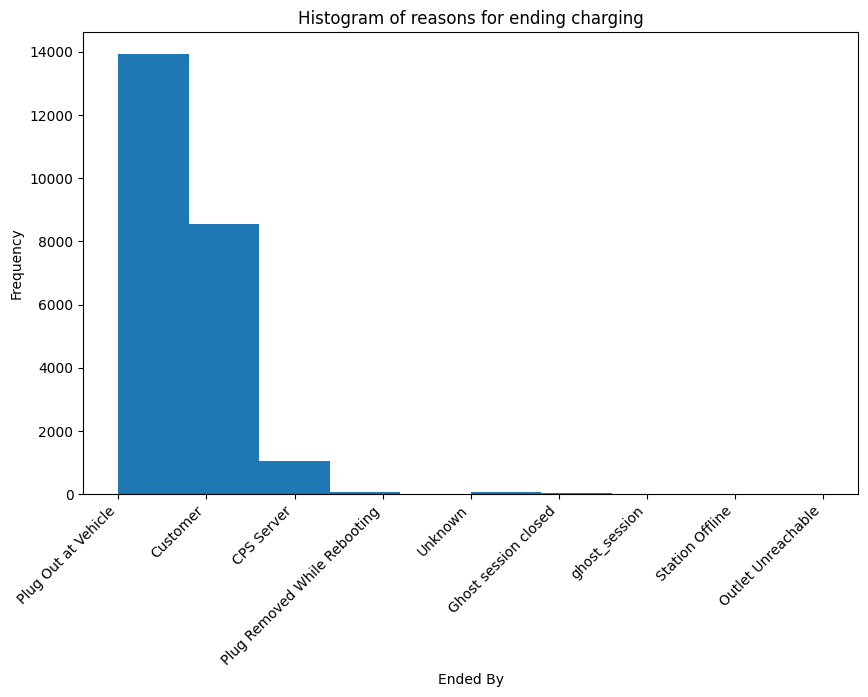

In [364]:
# Convert NaN values to 'Unknown' and the column to string type
viasatCharging_df['Ended By'] = viasatCharging_df['Ended By'].fillna('Unknown').astype(str)

plt.figure(figsize=(10, 6))
plt.hist(viasatCharging_df['Ended By'])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Ended By')
plt.ylabel('Frequency')
plt.title('Histogram of reasons for ending charging')
plt.show()

### Charging Time

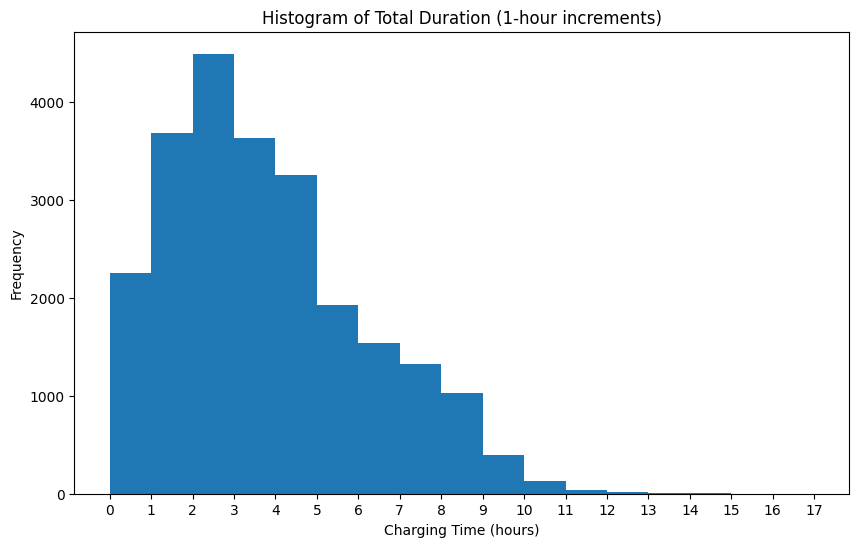

In [365]:
# Convert 'Total Duration (hh:mm:ss)' to total hours
def convert_to_hours(duration):
    hours, minutes, seconds = map(int, duration.split(':'))
    total_hours = hours + minutes / 60 + seconds / 3600
    return total_hours

viasatCharging_df['Charging Time (hours)'] = viasatCharging_df['Charging Time (hh:mm:ss)'].apply(convert_to_hours)

# Define bins for grouping (1-hour increments)
bins = range(0, int(viasatCharging_df['Charging Time (hours)'].max()) + 1, 1)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(viasatCharging_df['Charging Time (hours)'], bins=bins)
plt.xlabel('Charging Time (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Duration (1-hour increments)')
plt.xticks(bins)
plt.show()


### Start and End Times Grouped by Hour

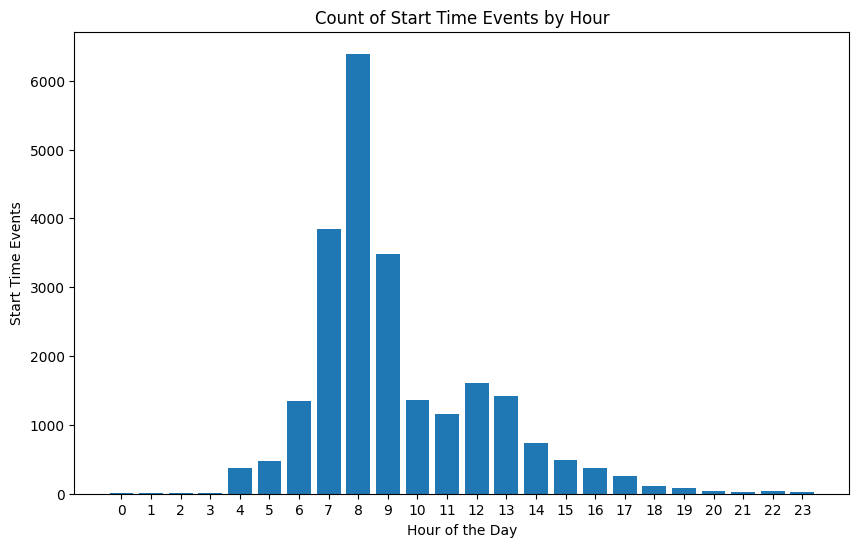

In [366]:
# Convert "Start Time" to datetime
viasatCharging_df['Start Time'] = pd.to_datetime(viasatCharging_df['Start Time'], format='%H:%M:%S')

# Extract the hour from "Start Time"
viasatCharging_df['Start Hour'] = viasatCharging_df['Start Time'].dt.hour

# Group by the extracted hour
start_times_grouped = viasatCharging_df.groupby('Start Hour').size().reset_index(name='Count')

# Plot the grouped data
plt.figure(figsize=(10, 6))
plt.bar(start_times_grouped['Start Hour'], start_times_grouped['Count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Start Time Events')
plt.title('Count of Start Time Events by Hour')
plt.xticks(start_times_grouped['Start Hour'])
plt.show()

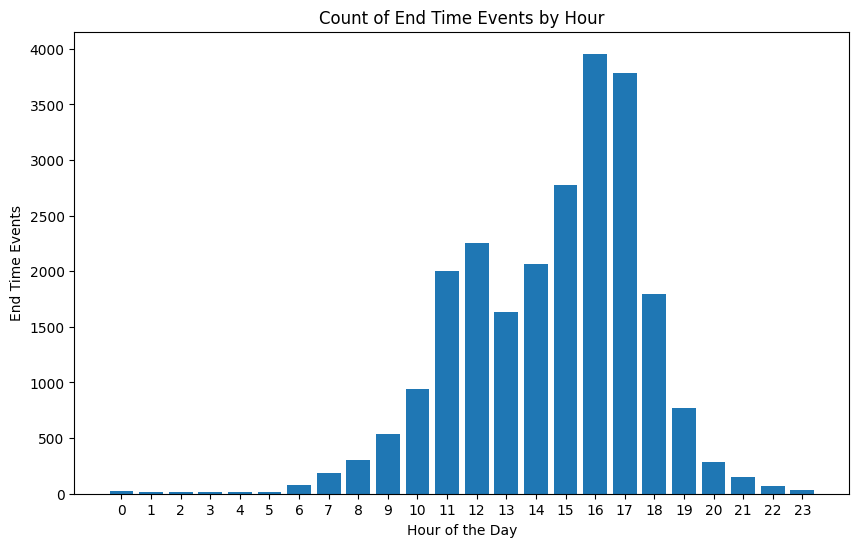

In [367]:

# Convert "End Time" to datetime
viasatCharging_df['End Time'] = pd.to_datetime(viasatCharging_df['End Time'], format='%H:%M:%S')

# Extract the hour from "End Time"
viasatCharging_df['End Hour'] = viasatCharging_df['End Time'].dt.hour

# Group by the extracted hour
end_times_grouped = viasatCharging_df.groupby('End Hour').size().reset_index(name='Count')

# Plot the grouped data
plt.figure(figsize=(10, 6))
plt.bar(end_times_grouped['End Hour'], end_times_grouped['Count'])
plt.xlabel('Hour of the Day')
plt.ylabel('End Time Events')
plt.title('Count of End Time Events by Hour')
plt.xticks(end_times_grouped['End Hour'])
plt.show()

The mode Start Hour for charging occurrences is around 8 am. The mode End Hour for charging occurrences is around 4/5 pm. This reflects the typical 8 hour, 9-5 workday. 

### Energy (kWh) vs. Gasoline Saved (gallons)

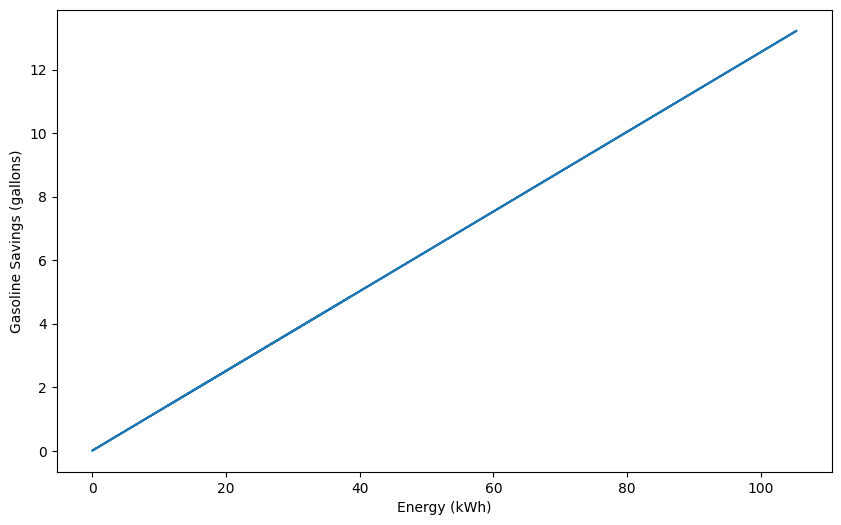

Constant of 7.968 to convert kWh to Gallons Saved


In [368]:
# plotting Energy (kWh) vs. Gasoline Saved (gallons)
plt.figure(figsize=(10, 6))
plt.plot(viasatCharging_df['Energy (kWh)'], viasatCharging_df['Gasoline Savings (gallons)'])
plt.xlabel('Energy (kWh)')
plt.ylabel('Gasoline Savings (gallons)')
plt.show()

const = viasatCharging_df['Energy (kWh)'] / viasatCharging_df['Gasoline Savings (gallons)']
print('Constant of ' + str(round(const[0], 3)) + ' to convert kWh to Gallons Saved')

### Gasoline Saved By Month

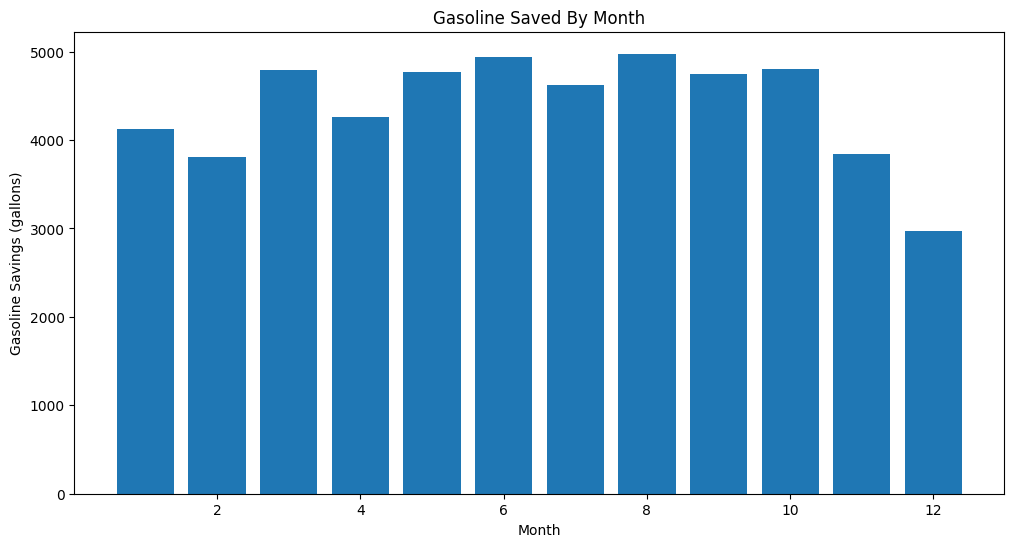

Avereage: 4387.512083333334


In [369]:
viasatCharging_df['Start Date'] = pd.to_datetime(viasatCharging_df['Start Date'])

viasatCharging_df['Month'] = viasatCharging_df['Start Date'].dt.month

gas_per_month = viasatCharging_df.groupby('Month')['Gasoline Savings (gallons)'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(gas_per_month['Month'], gas_per_month['Gasoline Savings (gallons)'])
plt.title('Gasoline Saved By Month')
plt.xlabel('Month')
plt.ylabel('Gasoline Savings (gallons)')
plt.show()
print('Avereage:', gas_per_month['Gasoline Savings (gallons)'].mean())

### Energy Consumption by Month

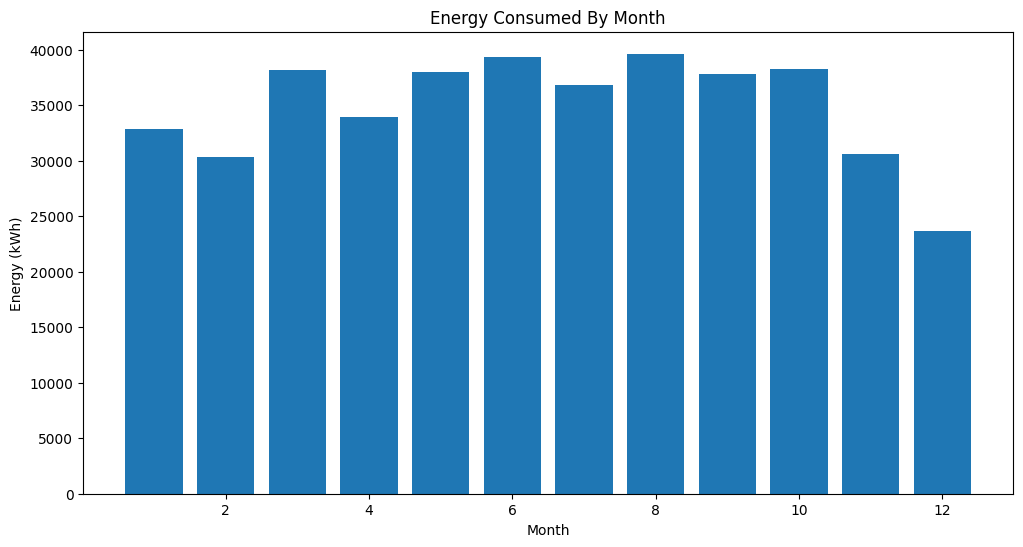

Average: 34960.24883333334


In [370]:
viasatCharging_df['Start Date'] = pd.to_datetime(viasatCharging_df['Start Date'])

viasatCharging_df['Month'] = viasatCharging_df['Start Date'].dt.month

kwh_per_month = viasatCharging_df.groupby('Month')['Energy (kWh)'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(kwh_per_month['Month'], kwh_per_month['Energy (kWh)'])
plt.title('Energy Consumed By Month')
plt.xlabel('Month')
plt.ylabel('Energy (kWh)')
plt.show()
print('Average:', kwh_per_month['Energy (kWh)'].mean())

### Charging trends per month

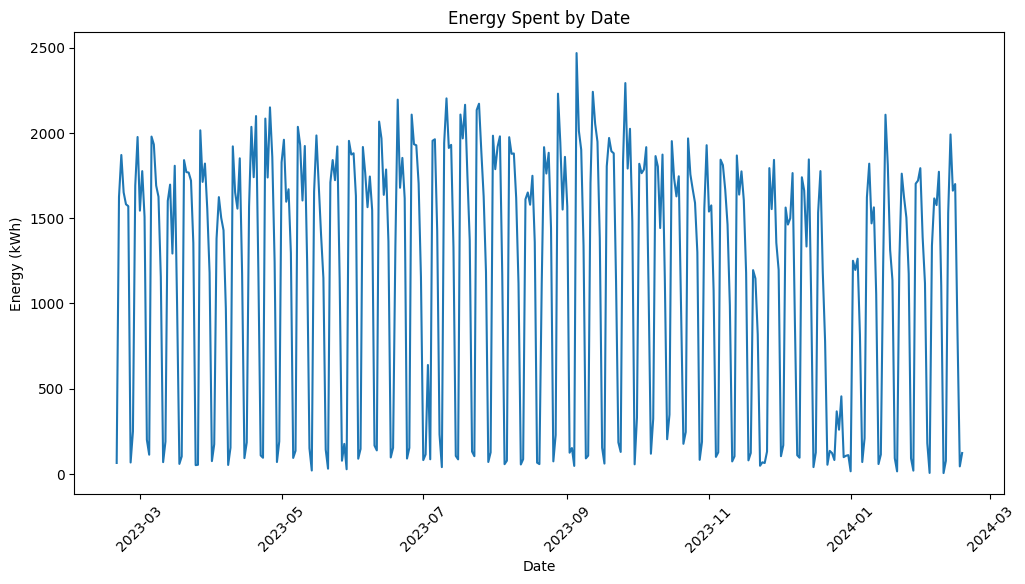

In [371]:
import matplotlib.pyplot as plt

dailyTotalEnergy = viasatCharging_df.groupby('Start Date')['Energy (kWh)'].sum().reset_index()
# Plotting the energy spent by date
plt.figure(figsize=(12, 6))
plt.plot(dailyTotalEnergy['Start Date'], dailyTotalEnergy['Energy (kWh)'])
plt.title('Energy Spent by Date')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**This could be used if we have all data for different years!!!**

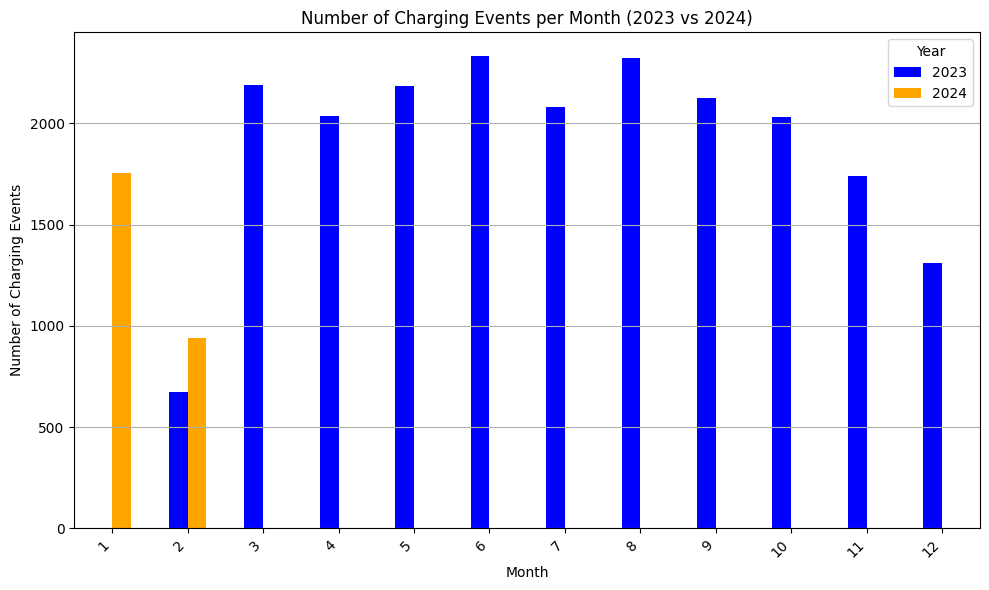

In [372]:
# To be able to work with the data
viasatCharging_df['Start Date'] = pd.to_datetime(viasatCharging_df['Start Date'])

# Extract year from 'Start Date'
viasatCharging_df['Year'] = viasatCharging_df['Start Date'].dt.year

# Group by year and month to count the number of charging events per month
charging_per_month = viasatCharging_df.groupby([viasatCharging_df['Year'], viasatCharging_df['Start Date'].dt.month]).size()

# Unstack the dataframe to have separate columns for each year
charging_per_month_unstacked = charging_per_month.unstack(level=0)

# Plotting
charging_per_month_unstacked.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Number of Charging Events')
plt.title('Number of Charging Events per Month (2023 vs 2024)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Extracting information

#### Daily data

In [373]:
# Convert 'Charging Time (hh:mm:ss)' to timedelta
viasatCharging_df['Charging Time'] = pd.to_timedelta(viasatCharging_df['Charging Time (hh:mm:ss)'])
viasatCharging_df['Energy (kWh)'] = pd.to_numeric(viasatCharging_df['Energy (kWh)'])

# Create daily DataFrame
daily_data = viasatCharging_df.groupby('Start Date').agg(
    total_charging_time=pd.NamedAgg(column='Charging Time', aggfunc='sum'),
    avg_charging_time=pd.NamedAgg(column='Charging Time', aggfunc='mean'),
    max_charging_time=pd.NamedAgg(column='Charging Time', aggfunc='max'),
    min_charging_time=pd.NamedAgg(column='Charging Time', aggfunc='min'),
    total_energy=pd.NamedAgg(column='Energy (kWh)', aggfunc='sum'),
    avg_energy=pd.NamedAgg(column='Energy (kWh)', aggfunc='mean'),
    max_energy=pd.NamedAgg(column='Energy (kWh)', aggfunc='max'),
    min_energy=pd.NamedAgg(column='Energy (kWh)', aggfunc='min')
).reset_index()

# Define a function to format timedelta to 'hh:mm:ss'
def format_timedelta(td):
    hours, remainder = divmod(td.total_seconds(), 3600)
    minutes, seconds = divmod(remainder, 60)
    return f'{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}'

# Format timedelta columns in the daily DataFrame
daily_data['avg_charging_time'] = daily_data['avg_charging_time'].apply(format_timedelta)
daily_data['max_charging_time'] = daily_data['max_charging_time'].apply(format_timedelta)
daily_data['min_charging_time'] = daily_data['min_charging_time'].apply(format_timedelta)

In [374]:
daily_data

,Start Date,total_charging_time,avg_charging_time,max_charging_time,min_charging_time,total_energy,avg_energy,max_energy,min_energy
0,2023-02-19,0 days 11:09:53,02:47:28,05:32:16,01:22:11,63.616,15.904000,30.546,7.558
1,2023-02-20,14 days 05:58:16,03:58:35,10:09:09,00:24:03,1623.754,18.880860,58.610,1.402
2,2023-02-21,17 days 03:39:37,03:53:00,14:08:16,00:04:51,1869.823,17.639840,82.040,0.462
3,2023-02-22,14 days 06:40:29,03:45:56,10:28:47,00:17:14,1650.559,18.138011,57.200,1.073
4,2023-02-23,14 days 04:16:36,03:41:55,10:12:49,00:05:35,1580.765,17.182228,61.045,0.537
...,...,...,...,...,...,...,...,...,...
360,2024-02-14,15 days 02:34:03,03:56:27,08:57:07,00:00:36,1660.643,18.050467,53.496,0.017
361,2024-02-15,15 days 00:55:06,03:50:22,08:31:37,00:01:09,1699.469,18.079457,51.733,0.044
362,2024-02-16,7 days 16:50:45,03:33:17,10:13:21,00:23:01,825.192,15.869077,43.551,1.052
363,2024-02-17,0 days 08:04:54,01:36:58,03:58:29,00:29:12,43.545,8.709000,23.827,2.893


#### Monthly data

In [375]:
# Create monthly DataFrame
viasatCharging_df['Start Date'] = pd.to_datetime(viasatCharging_df['Start Date'])
viasatCharging_df['Month'] = viasatCharging_df['Start Date'].dt.month
viasatCharging_df['Year'] = viasatCharging_df['Start Date'].dt.year

monthly_data = viasatCharging_df.groupby(['Year', 'Month']).agg(
    total_charging_time=pd.NamedAgg(column='Charging Time', aggfunc='sum'),
    avg_charging_time=pd.NamedAgg(column='Charging Time', aggfunc='mean'),
    max_charging_time=pd.NamedAgg(column='Charging Time', aggfunc='max'),
    min_charging_time=pd.NamedAgg(column='Charging Time', aggfunc='min'),
    total_energy=pd.NamedAgg(column='Energy (kWh)', aggfunc='sum'),
    avg_energy=pd.NamedAgg(column='Energy (kWh)', aggfunc='mean'),
    max_energy=pd.NamedAgg(column='Energy (kWh)', aggfunc='max'),
    min_energy=pd.NamedAgg(column='Energy (kWh)', aggfunc='min')
).reset_index()

# Define a function to format timedelta to 'hh:mm:ss'
def format_timedelta(td):
    hours, remainder = divmod(td.total_seconds(), 3600)
    minutes, seconds = divmod(remainder, 60)
    return f'{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}'

# Format timedelta columns in the daily DataFrame
monthly_data['avg_charging_time'] = monthly_data['avg_charging_time'].apply(format_timedelta)
monthly_data['max_charging_time'] = monthly_data['max_charging_time'].apply(format_timedelta)
monthly_data['min_charging_time'] = monthly_data['min_charging_time'].apply(format_timedelta)


In [376]:
monthly_data

,Year,Month,total_charging_time,avg_charging_time,max_charging_time,min_charging_time,total_energy,avg_energy,max_energy,min_energy
0,2023,2,110 days 05:11:35,03:55:07,14:08:16,00:00:38,12338.994,18.279991,82.040,0.015
1,2023,3,349 days 15:42:11,03:49:48,14:01:21,00:00:02,38157.089,17.415376,73.490,0.000
2,2023,4,316 days 12:28:14,03:44:05,14:33:26,00:00:01,33945.544,16.689058,65.185,0.000
3,2023,5,344 days 20:43:34,03:47:16,12:47:09,00:00:01,37965.182,17.375369,66.926,0.000
4,2023,6,355 days 11:09:53,03:39:24,11:48:06,00:00:03,39387.380,16.882718,68.592,0.000
5,2023,7,336 days 06:02:31,03:52:33,14:51:20,00:00:03,36802.074,17.676308,68.854,0.000
6,2023,8,363 days 11:21:14,03:45:18,13:46:41,00:00:07,39654.615,17.070433,75.562,0.000
7,2023,9,337 days 10:42:29,03:48:53,17:50:23,00:00:01,37797.046,17.803602,93.466,0.000
8,2023,10,329 days 18:31:52,03:53:55,17:30:18,00:00:02,38283.780,18.859005,105.361,0.000
9,2023,11,270 days 15:32:19,03:43:59,12:52:14,00:00:02,30624.755,17.600434,73.329,0.000
